In [3]:
include("imports.jl")

plot_autocorrelator! (generic function with 2 methods)

In [ ]:
Ls = [5, 6, 7, 8]
bc = "obc"
w = 0
t_max = 100
n_steps = 1000
n_realizations = 1
hamiltonian_path = joinpath(data(), "hamiltonians")
autocorrelator_path = joinpath(data(), "autocorrelators")

N_tests = 10
errs = []
for L in Ls
    diffs = []
    for _ in 1:N_tests
        corr1 = real.(autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path))
        corr2 = real.(autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path))
        diff = abs.(corr1 - corr2)
        append!(diffs, mean(diff))
    end
    append!(errs, mean(diffs))
end
plt = scatter(Ls, errs, dpi=300, legend=false, yscale=:log10)
xlabel!(plt, "System size")
ylabel!(plt, "Average error from typicality")
savefig(plt, "./thesisfigs/typicality_error.png")

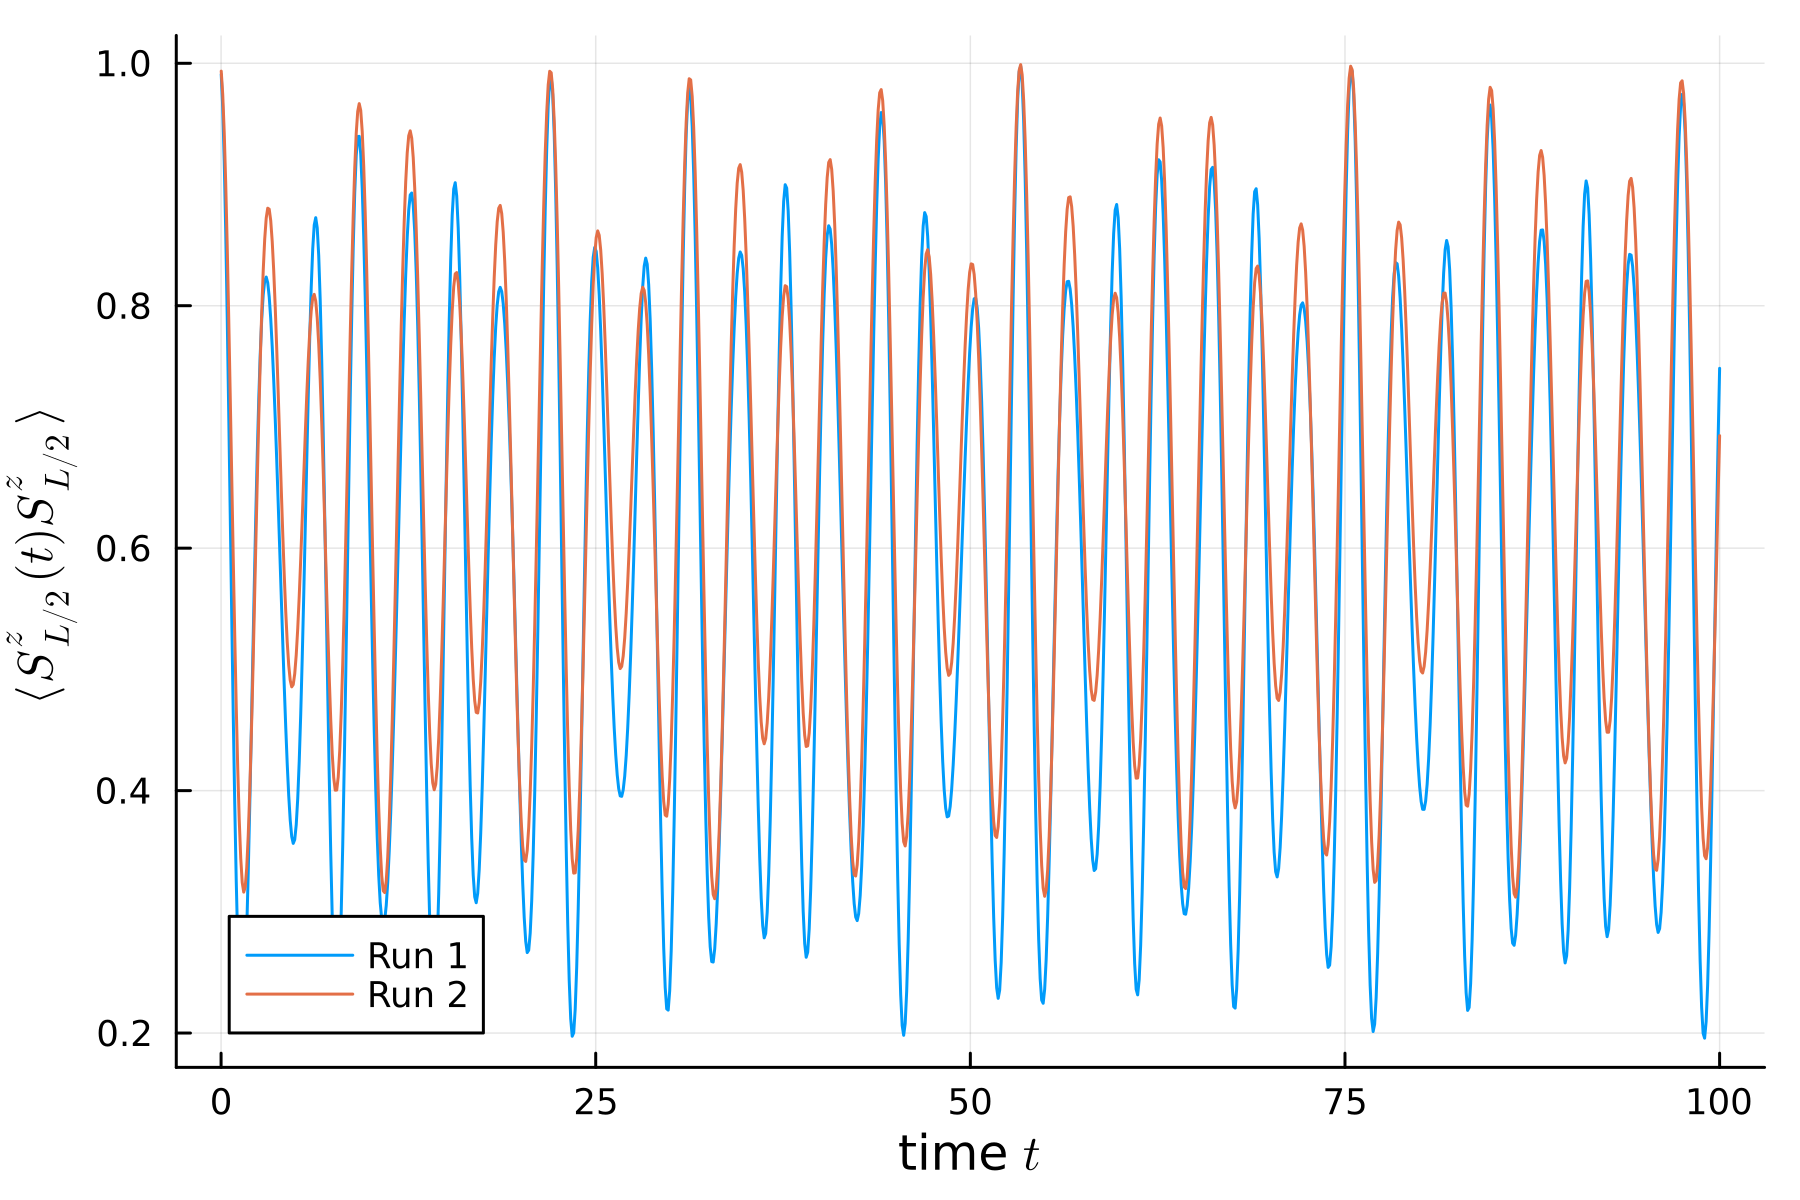

In [4]:
L = 6
bc = "obc"
w = 0
t_max = 100
n_steps = 1000
n_realizations = 1
hamiltonian_path = joinpath(data(), "hamiltonians")
autocorrelator_path = joinpath(data(), "autocorrelators")

corr1 = autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path)
corr2 = autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path) 
plt = plot(range(0.01, t_max, n_steps), real.(corr1), label="Run 1", dpi=300)
plot!(plt, range(0.01, t_max, n_steps), real.(corr2), label="Run 2")
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
savefig(plt, "./thesisfigs/test_typicality_1run.png")
plt

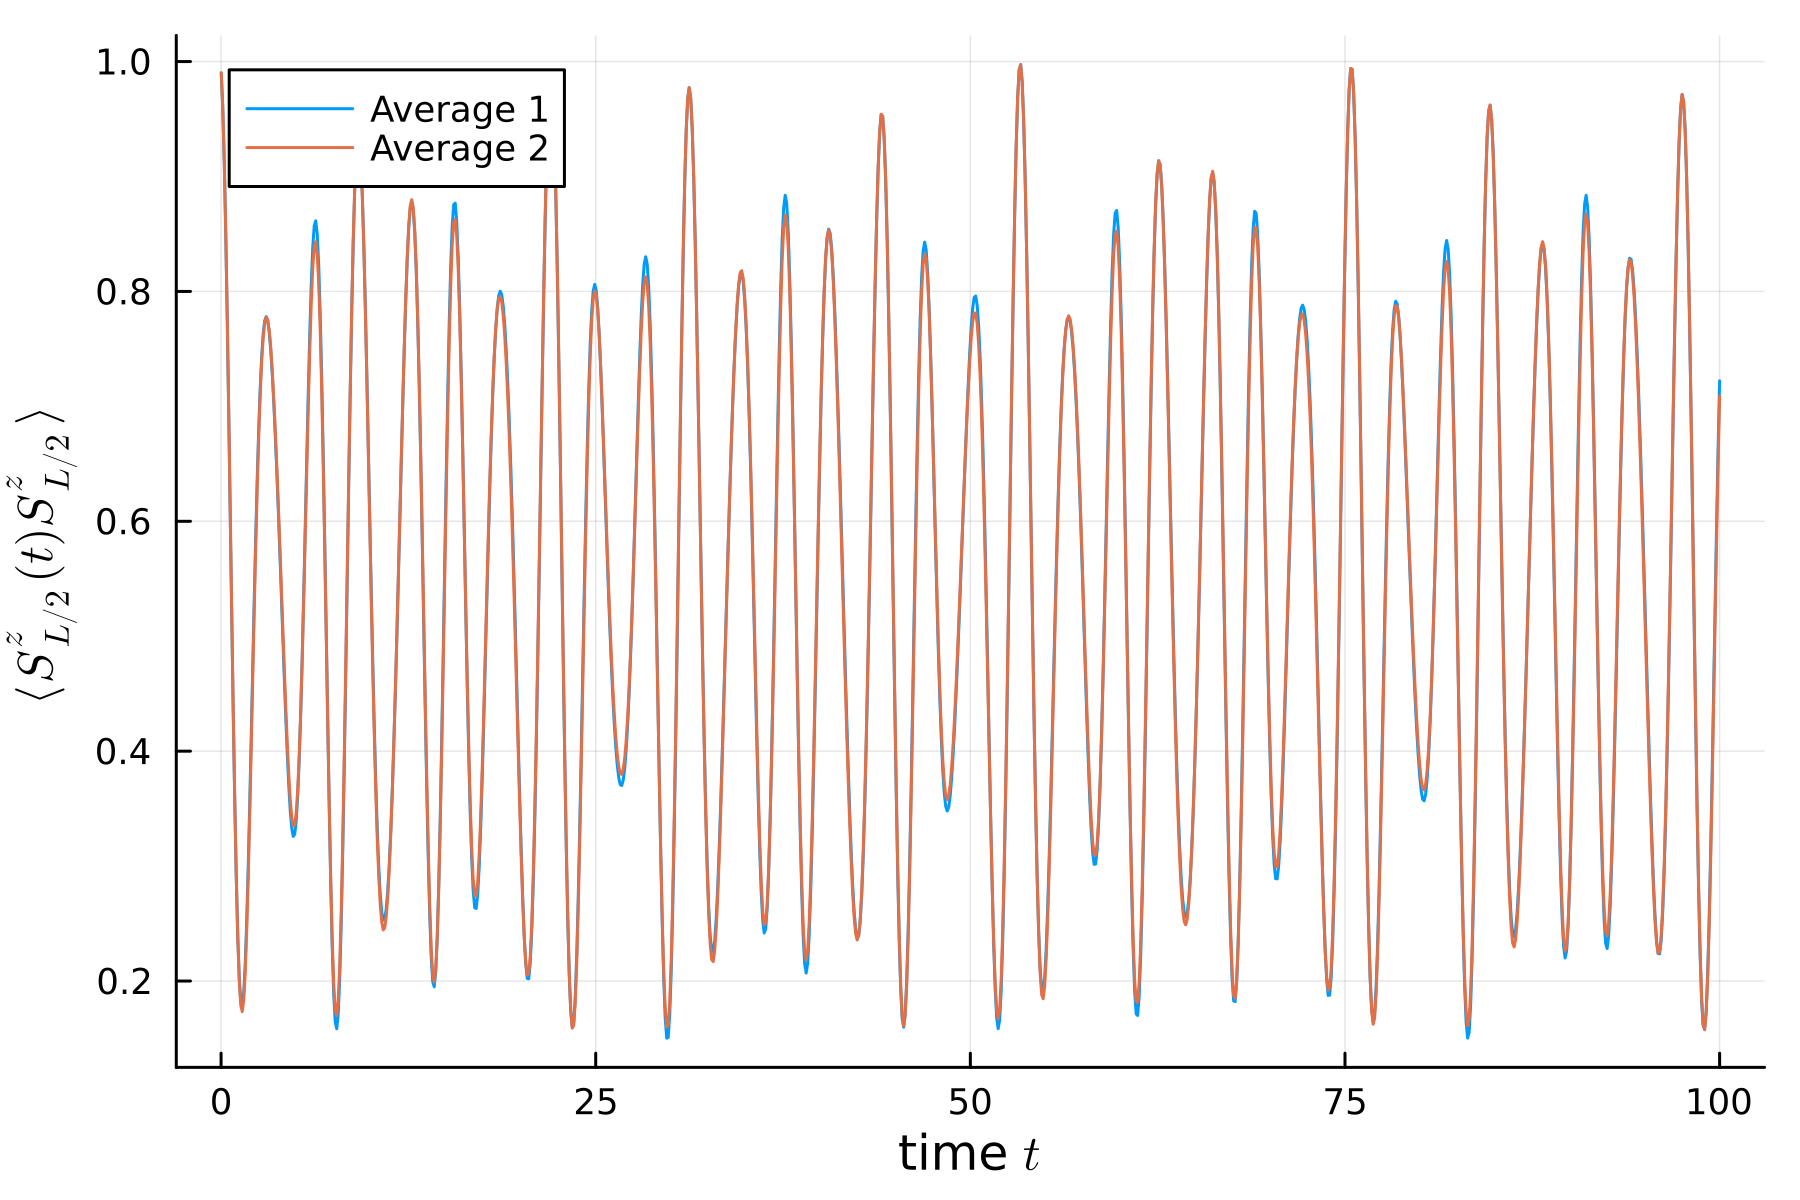

In [6]:
L = 6
bc = "obc"
w = 0
t_max = 100
n_steps = 1000
n_realizations = 1
hamiltonian_path = joinpath(data(), "hamiltonians")
autocorrelator_path = joinpath(data(), "autocorrelators")

n_tests = 100
corr1 = sum(autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path)/n_tests for _ in 1:n_tests)
corr2 = sum(autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path)/n_tests for _ in 1:n_tests)
plt = plot(range(0.01, t_max, n_steps), real.(corr1), label="Average 1", dpi=300)
plot!(plt, range(0.01, t_max, n_steps), real.(corr2), label="Average 2")
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
savefig(plt, "./thesisfigs/test_typicality_average_100.png")
plt

In [ ]:
L = 6
bc = "obc"
w = 0
t_max = 100
n_steps = 1000
n_realizations = 1
hamiltonian_path = joinpath(data(), "hamiltonians")
autocorrelator_path = joinpath(data(), "autocorrelators")

n_tests = 100
corrl = sum(autocorrelator("lanczos", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path)/n_tests for _ in 1:n_tests)
corred = sum(autocorrelator("ed", "feldmeier", L, t_max, n_steps, w, n_realizations, bc, hamiltonian_path)/n_tests for _ in 1:n_tests)
plt = plot(range(0.01, t_max, n_steps), real.(corrl), label="Lanczos", dpi=300)
plot!(plt, range(0.01, t_max, n_steps), real.(corred), label="ED")
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
savefig(plt, "./thesisfigs/test_lanczos_average_100.png")
plt

In [ ]:
L = [12, 18, 24, 30]
t_max = 1000
n_runs = 50000
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")
plt = plot(scale=:log10, dpi=300)
xlabel!(plt,"time \$ t \$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")

for l in L
    plot_autocorrelator!(plt, "\$H_3 + H_4\$, \$L=$l\$", "ca", "combined", l, bc, 0, t_max, n_runs, 1, autocorrelator_path, nothing)
end
t = range(1, 1000, 1000)
c50 = read_autocorrelator("ca", "combined", 50, bc, 0, t_max, n_runs, 1, autocorrelator_path) .- 2/150
plot!(plt, t, c50, label="\$H_3 + H_4\$, \$L=50\$", color=:black)
plot!(plt, t, 1/6.5 * t .^ (-1/4), label="\$\\propto t^{-\\frac{1}{4}}\$", linewidth = 4)
savefig(plt, "./thesisfigs/convergence_to_decay_size.png")
plt

In [ ]:
L = [12, 18, 24, 30, 50]
t_max = 1000
n_runs = 100000
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")
plt = plot(scale=:log10, dpi=300)
xlabel!(plt,"time \$ t \$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
for l in L
    plot_autocorrelator!(plt, "\$L=$l\$", "ca", "feldmeier", l, bc, 0, t_max, n_runs, 1, autocorrelator_path, nothing)
end
t = range(1, 1000, 1000)

c100 = read_autocorrelator("ca", "feldmeier", 100, bc, 0, t_max, n_runs, 1, autocorrelator_path) .- 1/4
plot!(plt, t, c100, label="\$H_3 + H_4\$, \$L=100\$", color=:black)
plot!(plt, t, 1/13 * t .^ (-1/4), label="\$\\propto t^{-\\frac{1}{4}}\$", linewidth = 4)
savefig(plt, "./thesisfigs/convergence_to_decay_size_feldmeier.png")
plt

In [ ]:
L = 50
t_max = 1000
n_runs = 100000
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")
plt = plot_autocorrelator("\$H_3\$", "ca", "h3", L, bc, 0, t_max, n_runs, 1, autocorrelator_path, nothing)
plot_autocorrelator!(plt, "\$H_3 + H_4\$", "ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path, nothing)
t = range(1, 1000, 1000)
plot!(plt, t, 1/6.5 * t .^ (-1/4), label="\$\\propto t^{-\\frac{1}{4}}\$", linewidth = 4)
savefig(./thesisfigs/ca_sala_50_100000runs.png)
plt

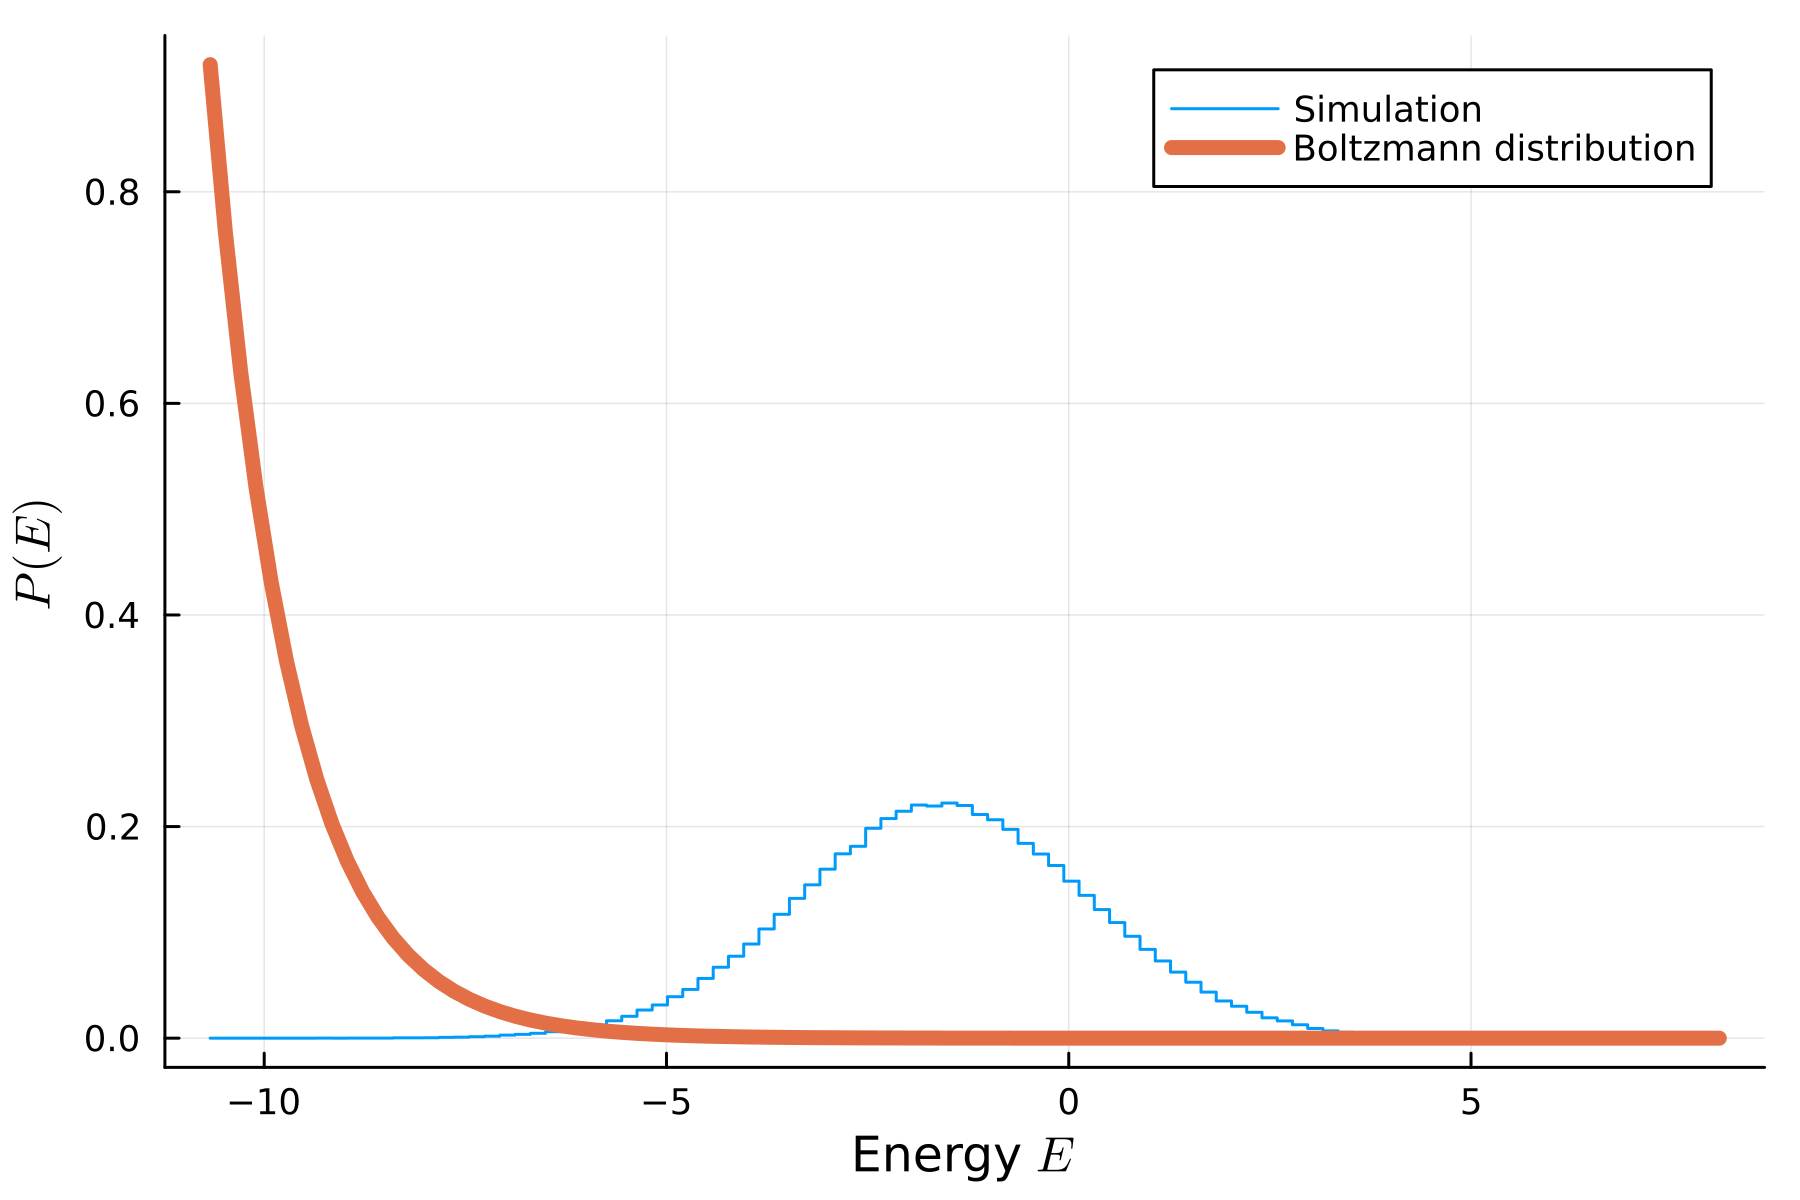

In [9]:
args=(L=20, t_max=500, n_runs=1000, w=1, n_realizations=100, β=1, bc="obc")
plt = h3_confirm_sampling(args...)
savefig(plt, "./thesisfigs/energy_distribution_final.png")
plt

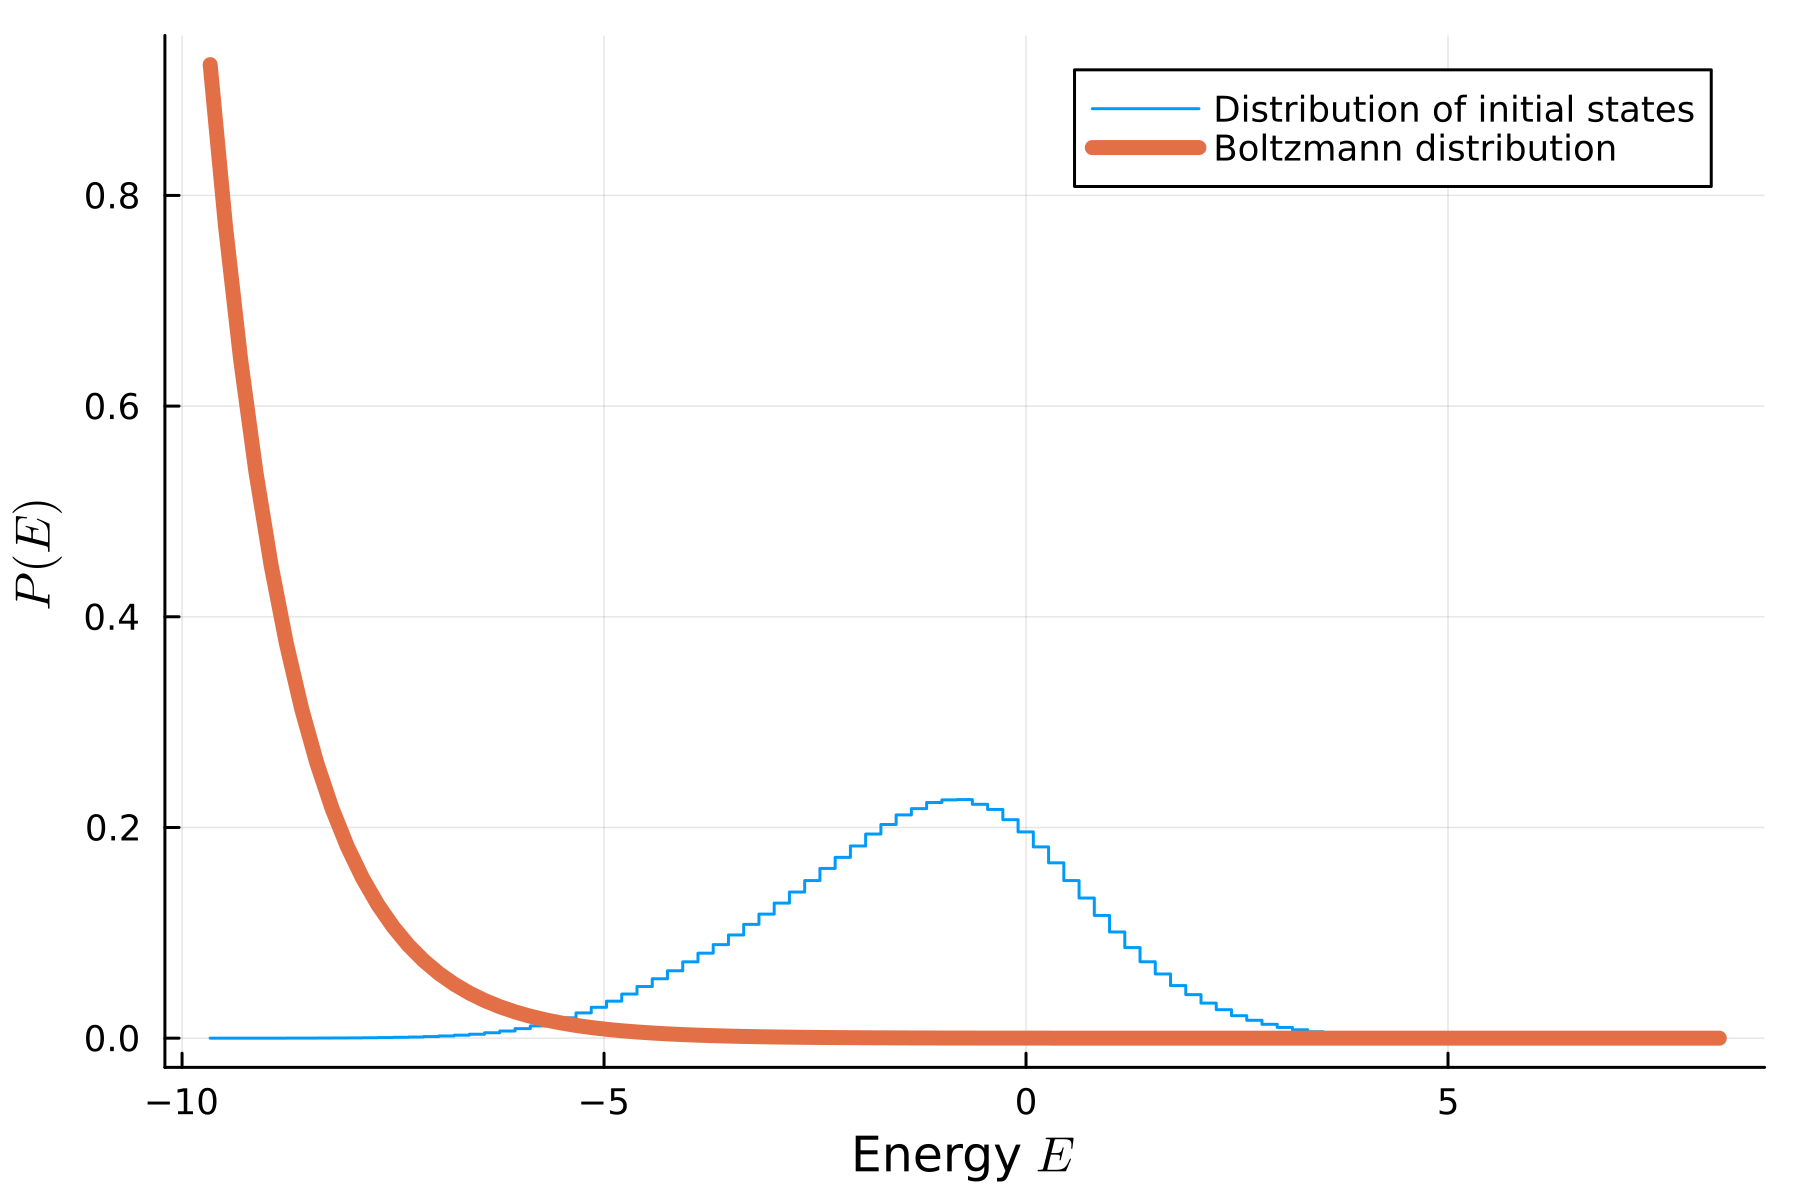

In [7]:
args=(L=20, n_runs=100000, w=1, n_realizations=100, β=1, bc="obc")
plt = h3_initial_sampling(args...)
savefig(plt, "thesisfigs/energy_distribution_initial.png")
plt

In [ ]:
L = 50
t_max = 1000
n_runs = 100
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")

c = read_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path)
if c === nothing
    c = save_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path, Nothing)
end
c = c .- 2/(3*L)

t = range(1, t_max, t_max)
plt = plot(dpi=300, scale=:log10)
xlabel!(plt,"time \$ t \$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
plot!(plt, t, abs.(c), label="\$H_3 + H_4\$, \$L=$L\$, Number of runs = $n_runs")
savefig(plt, "./thesisfigs/ca_statistics_$(n_runs).png")
plt

In [ ]:
L = 50
t_max = 1000
n_runs = 1000
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")

c = read_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path)
if c === nothing
    c = save_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path, Nothing)
end
c = c .- 2/(3*L)

t = range(1, t_max, t_max)
plt = plot(dpi=300, scale=:log10)
xlabel!(plt,"time \$ t \$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
plot!(plt, t, abs.(c), label="\$H_3 + H_4\$, \$L=$L\$, Number of runs = $n_runs")
savefig(plt, "./thesisfigs/ca_statistics_$(n_runs).png")
plt

In [ ]:
L = 50
t_max = 1000
n_runs = 100000
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")

c = read_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path)
if c === nothing
    c = save_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path, Nothing)
end
c = c .- 2/(3*L)

t = range(1, t_max, t_max)
plt = plot(dpi=300, scale=:log10)
xlabel!(plt,"time \$ t \$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
plot!(plt, t, abs.(c), label="\$H_3 + H_4\$, \$L=$L\$, Number of runs = $n_runs")
savefig(plt, "./thesisfigs/ca_statistics_$(n_runs).png")
plt

In [ ]:
L = 50
t_max = 1000
n_runs_list = [100, 1000, 10^4, 10^5, 10^6]
bc = "obc"
autocorrelator_path = joinpath(data(), "autocorrelators")
δt = 10
variances = []

for n_runs in n_runs_list
    c = read_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path)
    if c === nothing
        c = save_autocorrelator("ca", "combined", L, bc, 0, t_max, n_runs, 1, autocorrelator_path, Nothing)
    end
    c = c .- 2/(3*L)
    vars = []
    for t in [500, 600, 700, 800, 900]
        block = c[t:(t+δt)]
        push!(vars, var(block))
    end
    push!(variances, mean(vars))
end
plt = scatter(n_runs_list, variances, scale=:log10, dpi=300, legend=false)
xlabel!(plt, "Number of runs")
ylabel!(plt, "Strength of the fluctuations")
savefig(plt, "./thesisfigs/ca_fluctuations.png")
plt

In [ ]:
method = "lanczos"
model= "feldmeier"
L = 20
bc = "obc"
w = 0
t_max = 1000
n_steps = 1000
n_realizations = 1
autocorrelator_path = joinpath(data(), "autocorrelators")

c = zeros(t_max)
N = 0
for file in readdir("./data/autocorrelators")
    if occursin("autocorrelators_$(method)_$(model)_L$(L)_w_$(w)_tmax$(t_max)_nsteps$(n_steps)_nrealizations$(n_realizations)_bc$(bc)"*r"[0-9]+.h5", file)
        c += read_variable(autocorrelator_path, file, "corr")
        N += 1
    end
end
c = 1/4 * real.(c) / N .- 0.1844^2 # 0.184 is the expectation value of the filling of a typical state

plt = plot(range(1, 1000, 1000), c, label="Hamiltonian from Feldmeier et al.", dpi=300, scale=:log10)
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")

m(t, p) = p[1] * t .^(-1/4)
p0 = [1/55]
p = LsqFit.curve_fit(m, 10:100, c[10:100], p0).param[1]
println(p)
plot!(plt, 10:100, p*(10:100).^(-1/4), label="\$\\propto t^{-1/4}\$", linewidth=4)
savefig(plt, "./thesisfigs/lanczos_w0.png")
plt

In [ ]:
method = "lanczos"
model= "feldmeier"
L = 20
bc = "obc"
w = 1
t_max = 1000
n_steps = 1000
n_realizations = 1
autocorrelator_path = joinpath(data(), "autocorrelators")

c = zeros(t_max)
N = 0
for file in readdir("./data/autocorrelators")
    if occursin("autocorrelators_$(method)_$(model)_L$(L)_w_$(w)_tmax$(t_max)_nsteps$(n_steps)_nrealizations$(n_realizations)_bc$(bc)"*r"[0-9]+.h5", file)
        c += read_variable(autocorrelator_path, file, "corr")
        N += 1
    end
end
c = 1/4 * real.(c) / N .- 0.1844^2 # 0.184 is the expectation value of the filling of a typical state

plt = plot(range(1, 1000, 1000), c, label="Hamiltonian from Feldmeier et al.", dpi=300, scale=:log10)
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")

m(t, p) = p[1] * t .^(-1/4)
p0 = [1/55]
p = LsqFit.curve_fit(m, 10:100, c[10:100], p0).param[1]
println(p)
plot!(plt, 10:100, p*(10:100).^(-1/4), label="\$\\propto t^{-1/4}\$", linewidth=4)
savefig(plt, "./thesisfigs/lanczos_w1.png")
plt

In [ ]:
method = "lanczos"
model= "feldmeier"
L = 20
bc = "obc"
w = 10
t_max = 1000
n_steps = 1000
n_realizations = 1
autocorrelator_path = joinpath(data(), "autocorrelators")

c = zeros(t_max)
N = 0
for file in readdir("./data/autocorrelators")
    if occursin("autocorrelators_$(method)_$(model)_L$(L)_w_$(w)_tmax$(t_max)_nsteps$(n_steps)_nrealizations$(n_realizations)_bc$(bc)"*r"[0-9]+.h5", file)
        c += read_variable(autocorrelator_path, file, "corr")
        N += 1
    end
end
c = 1/4 * real.(c) / N .- 0.1844^2 # 0.184 is the expectation value of the filling of a typical state

a, b = power_fit(10:100, c[10:100])
println("$a, $b")

plt = plot(range(1, 1000, 1000), c, label="Hamiltonian from Feldmeier et al.", dpi=300, scale=:log10)
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
plot!(plt, 10:100, a*(10:100).^(b), label="\$\\propto t^{$(round(b, digits=4))}\$", linewidth=4)
savefig(plt, "./thesisfigs/lanczos_w10_fitted.png")
plt

In [ ]:
method = "lanczos"
model= "feldmeier"
L = 20
bc = "obc"
w = 10
t_max = 1000
n_steps = 1000
n_realizations = 1
autocorrelator_path = joinpath(data(), "autocorrelators")

c = zeros(t_max)
N = 0
for file in readdir("./data/autocorrelators")
    if occursin("autocorrelators_$(method)_$(model)_L$(L)_w_$(w)_tmax$(t_max)_nsteps$(n_steps)_nrealizations$(n_realizations)_bc$(bc)"*r"[0-9]+.h5", file)
        c += read_variable(autocorrelator_path, file, "corr")
        N += 1
    end
end
c = 1/4 * real.(c) / N .- 0.1844^2 # 0.184 is the expectation value of the filling of a typical state

plt = plot(range(1, 1000, 1000), c, label="Hamiltonian from Feldmeier et al.", dpi=300, scale=:log10)
xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")

m(t, p) = p[1] * t .^(-1/4)
p0 = [1/55]
p = LsqFit.curve_fit(m, 10:100, c[10:100], p0).param[1]
println(p)

a, b = power_fit(10:100, c[10:100])
println("$a, $b")

plot!(plt, 10:100, p*(10:100).^(-1/4), label="\$\\propto t^{-1/4}\$", linewidth=4)
plot!(plt, 10:100, a*(10:100).^(b), label="\$\\propto t^{$(round(b, digits=4))}\$", linewidth=4)

savefig(plt, "./thesisfigs/lanczos_w10.png")
plt

In [ ]:
method = "lanczos"
model= "feldmeier"
L = 20
bc = "obc"
ws = [0, 1, 10]
t_max = 1000
n_steps = 1000
n_realizations = 1
autocorrelator_path = joinpath(data(), "autocorrelators")

c = zeros(Float64, t_max, size(ws, 1))
for (i, w) in enumerate(ws)
    N = 0
    for file in readdir("./data/autocorrelators")
        if occursin("autocorrelators_$(method)_$(model)_L$(L)_w_$(w)_tmax$(t_max)_nsteps$(n_steps)_nrealizations$(n_realizations)_bc$(bc)"*r"[0-9]+.h5", file)
            c[:, i] += real.(read_variable(autocorrelator_path, file, "corr"))
            N += 1
        end
    end
    c[:, i] /= 4 * N
    c[:, i] = c[:, i] .- 0.1844^2
end


plt = plot(range(1, 1000, 1000), c[:, 1], dpi=300, scale=:log10, label="\$w=$(ws[1])\$", legend=:right)
for i in 2:size(ws,1)
    plot!(plt, c[:, i], label="\$w=$(ws[i])\$")
end

xlabel!(plt, "time \$t\$")
ylabel!(plt, "\$ \\langle S_{L/2}^z(t)S_{L/2}^z\\rangle\$")
savefig(plt, "./thesisfigs/lanczos_all_w.png")
plt